### 1. Importing packages <a id=1></a>

In [1]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os
np.int
print("Packages imported...")

Packages imported...


### 2. Importing the dataset from training directory <a id=2></a>

In [5]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = 'asl_alphabet_train/'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

Images successfully imported...


#### 2.1 Checking the shape of data <a id=3></a>

In [6]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 64, 64, 3)
The shape of y_train is :  (87000,)


#### 2.2 Checking the shape of one image <a id=4></a>

In [7]:
print("The shape of one image is : ", X_train[0].shape)

The shape of one image is :  (64, 64, 3)


#### 2.3 Viewing the image <a id=5></a>

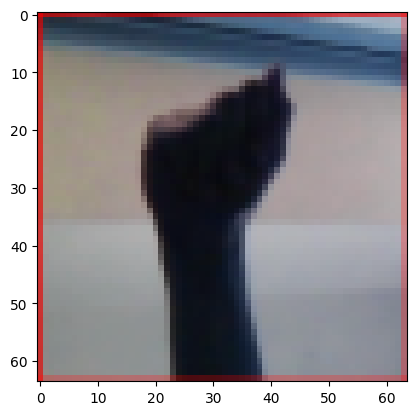

In [8]:
plt.imshow(X_train[0])
plt.show()

##### 2.3.1 Making copies of original data

In [9]:
X_data = X_train
y_data = y_train
print("Copies made...")

Copies made...


### 3. Data processing <a id=6></a>

#### 3.1 Train/test split <a id=7></a>

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

#### 3.2 One-Hot-Encoding <a id=8></a>

In [11]:
# One-Hot-Encoding the categorical data
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

#### 3.3 Dimension Check of variables <a id=9></a>

In [12]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)
(60900, 29)
(26100, 29)


### 4. Garbage Collection <a id=10></a>

In [13]:
# This is done to save CPU and RAM space while working on Kaggle Kernels. This will delete the specified data and save some space!
import gc
del X_data
del y_data
gc.collect()

3836

### 5. Modeling <a id=11></a>

#### 5.1 Importing packages <a id=12></a>

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

Packages imported...


#### 5.2 Building model <a id=13></a>

In [15]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                   

#### 5.3 Early Stopping and Compiling <a id=14></a>

##### 5.3.1 Early Stopping

Early Stopping is done to make sure the model fitting stops at the most optimized accuracy point. After the early stopping point, the model might start overfitting. For testing purposes, this step can be skipped and complete training can be done.

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

##### 5.3.2 Compiling

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### 5.4 Model fitting <a id=15></a>

In [18]:
model.fit(X_train, y_cat_train,
          epochs=50,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/50
952/952 - 258s - loss: 1.0231 - accuracy: 0.6912 - val_loss: 0.2208 - val_accuracy: 0.9289 - 258s/epoch - 270ms/step
Epoch 2/50
952/952 - 237s - loss: 0.1388 - accuracy: 0.9555 - val_loss: 0.1109 - val_accuracy: 0.9634 - 237s/epoch - 249ms/step
Epoch 3/50
952/952 - 260s - loss: 0.0656 - accuracy: 0.9794 - val_loss: 0.0360 - val_accuracy: 0.9883 - 260s/epoch - 273ms/step
Epoch 4/50
952/952 - 237s - loss: 0.0384 - accuracy: 0.9885 - val_loss: 0.0377 - val_accuracy: 0.9875 - 237s/epoch - 249ms/step
Epoch 5/50
952/952 - 220s - loss: 0.0432 - accuracy: 0.9872 - val_loss: 0.0204 - val_accuracy: 0.9937 - 220s/epoch - 231ms/step
Epoch 6/50
952/952 - 211s - loss: 0.0334 - accuracy: 0.9900 - val_loss: 0.0446 - val_accuracy: 0.9851 - 211s/epoch - 222ms/step
Epoch 7/50
952/952 - 229s - loss: 0.0348 - accuracy: 0.9900 - val_loss: 0.0215 - val_accuracy: 0.9939 - 229s/epoch - 241ms/step


#### 5.5 Model metrics <a id=16></a>

##### 5.5.1 Metrics from model history

In [19]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,1.023098,0.691199,0.220795,0.928851
1,0.138791,0.955517,0.110857,0.963372
2,0.065559,0.979442,0.036004,0.988314
3,0.038379,0.988456,0.037652,0.987510
4,0.043193,0.987225,0.020414,0.993716
5,0.033360,0.989967,0.044588,0.985057
6,0.034842,0.989984,0.021531,0.993870


##### 5.5.2 Plotting the training loss

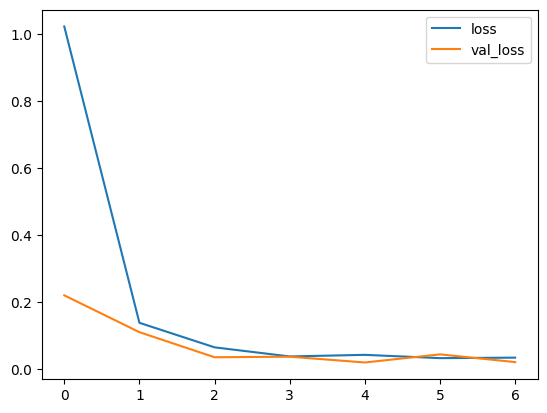

In [20]:
metrics[['loss','val_loss']].plot()
plt.show()

##### 5.5.3 Plotting the testing loss

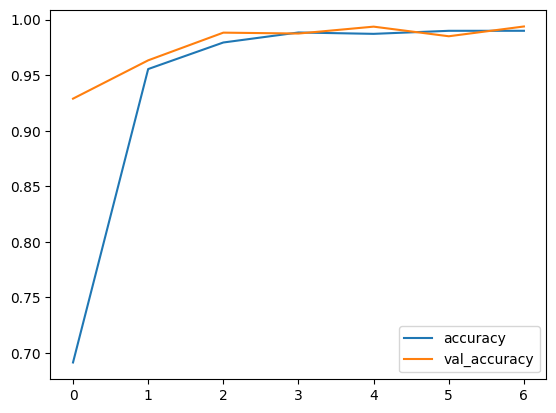

In [21]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

##### 5.5.4 Model evaluation

In [22]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.021530775353312492, 0.9938697218894958]

#### 5.6 Predictions <a id=17></a>

In [24]:
predictions = model.predict(X_test)
print("Predictions done...")

816/816 [==============================] - 22s 25ms/step
Predictions done...


##### 5.6.1 Classification report

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

##### 5.6.2 Confusion matrix heatmap

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,predictions))
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

<Figure size 1200x1200 with 0 Axes>

#### 5.7 Saving the model <a id=18></a>

In [27]:
# from keras.models import load_model
model.save('ASL.h5')
print("Model saved successfully...")

c:\Users\rajam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully...


[back to top](#19)

### If you liked the notebook, consider giving an upvote.

Check my other notebooks
1. https://www.kaggle.com/namanmanchanda/rnn-in-pytorch
2. https://www.kaggle.com/namanmanchanda/pytorch-101
3. https://www.kaggle.com/namanmanchanda/red-wine-eda-and-classification
4. https://www.kaggle.com/namanmanchanda/heart-attack-eda-prediction-90-accuracy